(150,)


/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=10, num_boost_round=10 will be ignored. Current value: num_iterations=10
0.9686684073107049


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


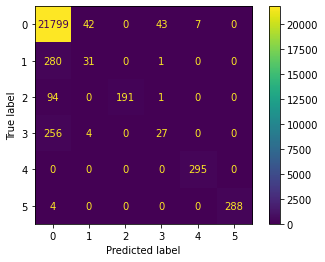

In [39]:
import lightgbm as lgb

import graphviz

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

"""LightGBM を使った多値分類のサンプルコード"""

def main():
    #データセットを読み込む
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    print(y.shape)
    
    #データの合成なし
#     X_train = np.loadtxt('/data/ap_data/02_b_train_data.txt')
#     y_train = np.loadtxt('/data/ap_data/02_b_train_label.txt', dtype='int64')
    
    X_test = np.loadtxt('/data/ap_data/02_b_test_data.txt')
    y_test = np.loadtxt('/data/ap_data/02_b_test_label.txt', dtype='int64')

#     #データの合成あり
    X_train_a = np.loadtxt('/data/ap_data/01_a_train_data.txt')
    y_train_a = np.loadtxt('/data/ap_data/01_a_train_label.txt', dtype='int64')
    
#     X_test_a = np.loadtxt('/data/ap_data/01_a_test_data.txt')
#     y_test_a = np.loadtxt('/data/ap_data/01_a_test_label.txt', dtype='int64')
    
    X_train_c = np.loadtxt('/data/ap_data/01_c_train_data.txt')
    y_train_c = np.loadtxt('/data/ap_data/01_c_train_label.txt', dtype='int64')
    
#     X_test_c = np.loadtxt('/data/ap_data/01_c_test_data.txt')
#     y_test_c = np.loadtxt('/data/ap_data/01_c_test_label.txt', dtype='int64')
    
    X_train_b = np.loadtxt('/data/ap_data/02_b_train_data.txt')
    y_train_b = np.loadtxt('/data/ap_data/02_b_train_label.txt', dtype='int64')
    
#     X_test_b = np.loadtxt('/data/ap_data/02_b_test_data.txt')
#     y_test_b = np.loadtxt('/data/ap_data/02_b_test_label.txt', dtype='int64')
    
    X_train = np.concatenate([X_train_a,X_train_b, X_train_c])
    y_train = np.concatenate([y_train_a, y_train_b, y_train_c])
    
#     X_test = np.concatenate([X_test_a, X_test_c])
#     y_test = np.concatenate([y_test_a, y_test_c])
    
    # データセットを生成する
    lgb_train = lgb.Dataset(X_train, y_train)
    
    


    #モデルの学習
    model2 = lgb.LGBMClassifier(objective='multiclass',n_estimators=6,num_boost_round=10)
    model2.fit(X_train, y_train,verbose=50)
#     model2.fit(X_train, y_train,eval_set=[(X_test_val , y_test_val)],verbose=50)
    
    #木構造の出力
#     tree = lgb.plot_tree(model2, figsize=(100, 100))
#     plt.show()
    
    # 特徴量の重要度をプロットする
#     lgb.plot_importance(model2, figsize=(12, 6))
#     plt.show()
    
    #各正解ラベルの正解率表示
    plot_confusion_matrix(model2,X_test,y_test)
    y_pred = model2.predict(X_test)

    # 精度 (Accuracy) を計算する
    accuracy = sum(y_test == y_pred) / len(y_test)
    print(accuracy)
    

if __name__ == '__main__':
    main()


In [6]:
!pip install matplotlib

     |████████████████████████████████| 10.3 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 41.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 44.1 MB/s eta 0:00:01     |████                            | 378 kB 44.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
